In [1]:
# NVIDIA CUDA
import torch
if torch.cuda.is_available():
    print("CUDA is available！")

    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

    print(f"Current GPU device: {torch.cuda.current_device()}")
else:
    print("CUDA is not available. Running on CPU.")

CUDA is available！
Number of available GPUs: 1
GPU 0: NVIDIA GeForce RTX 4070 SUPER
Current GPU device: 0


In [2]:
# here for libs
import pandas as pd

In [3]:
# Load individual datasets
olist_customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
order_items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
olist_orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
products_df = pd.read_csv('./data/olist_products_dataset.csv')
product_category_name_translation_df = pd.read_csv('./data/product_category_name_translation.csv')

# EDA

In [4]:
olist_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
olist_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Merge dataset

In [12]:
# marging datasets
merged_1 = pd.merge(olist_orders_df, olist_customers_df, on='customer_id', how='left')
merged_2 = pd.merge(sellers_df, order_items_df, on='seller_id', how='left')
merged_3 = pd.merge(products_df, product_category_name_translation_df, on = 'product_category_name', how = 'left')
merged_4 = pd.merge(merged_2, merged_3, on='product_id', how='left')
merged_5 = pd.merge(merged_1, merged_4, on='order_id', how='left')
merged_6 = pd.merge(merged_5, order_payments_df, on='order_id', how='left')
merged = pd.merge(merged_6, order_reviews_df, on='order_id', how='left')
merged.to_csv('./data/merged_data.csv', index=False)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  seller_id                     

In [13]:
merged.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
seller_id                           833
seller_zip_code_prefix              833
seller_city                         833
seller_state                        833
order_item_id                       833
product_id                          833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542


In [14]:
merged = merged.drop(columns=['review_comment_title', 'review_comment_message'], axis=1)
merged = merged.dropna()
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 119142
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113193 non-null  object 
 1   customer_id                    113193 non-null  object 
 2   order_status                   113193 non-null  object 
 3   order_purchase_timestamp       113193 non-null  object 
 4   order_approved_at              113193 non-null  object 
 5   order_delivered_carrier_date   113193 non-null  object 
 6   order_delivered_customer_date  113193 non-null  object 
 7   order_estimated_delivery_date  113193 non-null  object 
 8   customer_unique_id             113193 non-null  object 
 9   customer_zip_code_prefix       113193 non-null  int64  
 10  customer_city                  113193 non-null  object 
 11  customer_state                 113193 non-null  object 
 12  seller_id                      1131

#### Data cleaning

In [15]:
datetime = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date',
                    'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

for col in datetime:
    merged[col] = pd.to_datetime(merged[col])

# Extract components of dates
merged['purchase_day'] = merged['order_purchase_timestamp'].dt.weekday # Monday=0, Sunday=6
merged['purchase_month'] = merged['order_purchase_timestamp'].dt.month

# The total time from the purchase of the order to the actual delivery to the customer
merged['total_delivery_time'] = (merged['order_delivered_customer_date'] - merged['order_purchase_timestamp']).dt.days

# Time from order creation to payment approval
merged['approval_time'] = (merged['order_approved_at'] - merged['order_purchase_timestamp']).dt.days

# Time from logistics to customer delivery
merged['shipping_time'] = (merged['order_delivered_customer_date'] - merged['order_delivered_carrier_date']).dt.days

# Deviation between actual delivery time and estimated delivery time
merged['delivery_estimate_deviation'] = (merged['order_estimated_delivery_date'] - merged['order_delivered_customer_date']).dt.days

# Late delivery
merged['late_delivery'] = (merged['order_delivered_customer_date'] > merged['order_estimated_delivery_date']).astype(int)

# Total order item values and the total freight value
merged['total_order_item_value'] = merged['order_item_id'] * merged['price']
merged['total_freight_value'] = merged['order_item_id'] * merged['freight_value']

# Total order freight value
merged['total_order_freight_value'] = merged['total_order_item_value'] + merged['total_freight_value']


In [16]:
merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,purchase_day,purchase_month,total_delivery_time,approval_time,shipping_time,delivery_estimate_deviation,late_delivery,total_order_item_value,total_freight_value,total_order_freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,0,10,8,0,6,7,0,29.99,8.72,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,0,10,8,0,6,7,0,29.99,8.72,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,0,10,8,0,6,7,0,29.99,8.72,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1,7,13,1,12,5,0,118.70,22.76,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2,8,9,0,9,17,0,159.90,19.22,179.12


In [17]:
# Labeling
category_to_label = {
    'cama_mesa_banho': 0,
    'esporte_lazer': 1,
    'other': 2
}
merged['product_category_name'] = merged['product_category_name'].apply(lambda x: x if x in category_to_label else 'other')
merged['product_category_name'] = merged['product_category_name'].map(category_to_label)


name_to_label = {
    'bed_bath_table': 0,
    'sports_leisure': 1,
    'other': 2
}
merged['product_category_name_english'] = merged['product_category_name_english'].apply(lambda x: x if x in name_to_label else 'other')
merged['product_category_name_english'] = merged['product_category_name_english'].map(name_to_label)



In [18]:
category_to_label = {
    'credit_card': 0,
    'boleto': 1,
    'other': 2
}
merged['payment_type'] = merged['payment_type'].apply(lambda x: x if x in category_to_label else 'other')
merged['payment_type'] = merged['payment_type'].map(category_to_label)


In [19]:
merged['review_score'].value_counts()

review_score
5.0    65145
4.0    21811
1.0    12865
3.0     9533
2.0     3839
Name: count, dtype: int64

In [20]:
# Remove unnecessary features
merged = merged.select_dtypes(include=['int', 'float'])
merged.drop(['customer_zip_code_prefix', 'seller_zip_code_prefix', 'order_item_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'payment_sequential']
               , axis=1, inplace=True)
# save the cleaned dataset
merged.to_csv('./data/merged_data_cleaned.csv', index=False)

In [21]:
merged.head()

,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_type,payment_installments,...,purchase_day,purchase_month,total_delivery_time,approval_time,shipping_time,delivery_estimate_deviation,late_delivery,total_order_item_value,total_freight_value,total_order_freight_value
0,29.99,8.72,2,500.0,19.0,8.0,13.0,2,0,1.0,...,0,10,8,0,6,7,0,29.99,8.72,38.71
1,29.99,8.72,2,500.0,19.0,8.0,13.0,2,2,1.0,...,0,10,8,0,6,7,0,29.99,8.72,38.71
2,29.99,8.72,2,500.0,19.0,8.0,13.0,2,2,1.0,...,0,10,8,0,6,7,0,29.99,8.72,38.71
3,118.70,22.76,2,400.0,19.0,13.0,19.0,2,1,1.0,...,1,7,13,1,12,5,0,118.70,22.76,141.46
4,159.90,19.22,2,420.0,24.0,19.0,21.0,2,0,3.0,...,2,8,9,0,9,17,0,159.90,19.22,179.12


In [22]:
# extract the correlation matrix of review_score
corr_matrix = merged.corr()
corr_matrix['review_score'].sort_values(ascending=False)

review_score                     1.000000
delivery_estimate_deviation      0.228154
product_category_name_english    0.032753
product_category_name            0.032753
purchase_month                   0.028419
price                            0.003203
payment_type                     0.000278
product_width_cm                -0.011835
purchase_day                    -0.013958
approval_time                   -0.018635
product_length_cm               -0.020080
product_height_cm               -0.023240
product_weight_g                -0.026894
freight_value                   -0.033637
total_order_item_value          -0.038652
payment_installments            -0.043283
total_order_freight_value       -0.047604
payment_value                   -0.081312
total_freight_value             -0.098066
shipping_time                   -0.267258
total_delivery_time             -0.303545
late_delivery                   -0.329049
Name: review_score, dtype: float64

In [23]:
# Set the correlation threshold
threshold = 0.05

# Get the features with correlation greater than 5% or less than -5% with review_score
high_corr_features = corr_matrix[(corr_matrix['review_score'].abs() > threshold) & (corr_matrix['review_score'].index != 'review_score')].index

# Print the features with high correlation
print("Features with high correlation with review_score:")
print(high_corr_features)

Features with high correlation with review_score:
Index(['payment_value', 'total_delivery_time', 'shipping_time',
       'delivery_estimate_deviation', 'late_delivery', 'total_freight_value'],
      dtype='object')


In [24]:
data=merged
X = data.drop('review_score', axis=1)
y = data['review_score']


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample


smote = SMOTE(random_state=42)
X_smt, y_smt = smote.fit_resample(X, y)


scaling_factor = 0.2
X_smt, y_smt = resample(X_smt, y_smt, replace=False, n_samples=int(len(X_smt) * scaling_factor), random_state=42)


print(y_smt.value_counts())


review_score
1.0    13121
2.0    13105
5.0    13070
4.0    12941
3.0    12908
Name: count, dtype: int64


In [26]:
from sklearn.decomposition import PCA
import pandas as pd


n_components = 10
pca = PCA(n_components=n_components)


X_pca = pca.fit_transform(X)


X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])


print(X_pca_df.head())


           PC1         PC2        PC3        PC4        PC5       PC6  \
0 -1614.451834 -175.761881 -15.581950   9.582007 -11.240671  9.545183   
1 -1614.804328 -185.258519 -27.347666  15.160755 -11.117467  9.550348   
2 -1614.441561 -175.485157 -15.239362   9.420771 -11.243962  9.544531   
3 -1706.293476   31.225333 -17.862921  -5.500186   8.638355  7.096706   
4 -1683.241733  107.738288 -31.746319 -11.872653   2.846366  3.774542   

        PC7       PC8       PC9      PC10  
0  0.777170 -6.486278 -3.183233  3.785414  
1  0.758098 -6.458747 -3.206877  3.777090  
2  0.779334 -6.487550 -3.183430  3.786863  
3  6.649366 -1.372562  2.330340 -1.072980  
4 -4.665561  5.456546  1.156105 -3.326500  


In [27]:
X_corr = data[['payment_value', 'total_delivery_time', 'shipping_time', 'delivery_estimate_deviation', 'late_delivery']]
y_corr = data['review_score']


## 2.Validation methods

### 2.1 cross validation

In [28]:
import numpy as np

def manual_train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state) 
    indices = np.random.permutation(len(X))  
    test_set_size = int(len(X) * test_size)  
    test_indices = indices[:test_set_size]  
    train_indices = indices[test_set_size:]  
    

    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test



### 2.2 k fold validation

In [29]:
import numpy as np

def manual_kfold(X, y, k=5, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    fold_size = len(X) // k
    folds = []

    for i in range(k):
        test_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])
        folds.append((train_indices, test_indices))
    
    return folds


k_folds = manual_kfold(X, y, k=5, random_state=42)


for i, (train_idx, test_idx) in enumerate(k_folds):
    print(f"Fold {i+1}: Train size = {len(train_idx)}, Test size = {len(test_idx)}")


Fold 1: Train size = 90555, Test size = 22638
Fold 2: Train size = 90555, Test size = 22638
Fold 3: Train size = 90555, Test size = 22638
Fold 4: Train size = 90555, Test size = 22638
Fold 5: Train size = 90555, Test size = 22638


## 3.ML algorithms and Experimental results

### 3.1 Simple algorithms: Random Forest

In [29]:
print(y.value_counts())

review_score
5.0    65145
4.0    21811
1.0    12865
3.0     9533
2.0     3839
Name: count, dtype: int64


Experiment with Train Size 905: Accuracy = 0.550
Experiment with Train Size 905: Accuracy = 0.562
Experiment with Train Size 905: Accuracy = 0.550
Experiment with Train Size 905: Accuracy = 0.540
Experiment with Train Size 905: Accuracy = 0.554
Experiment with Train Size 9055: Accuracy = 0.564
Experiment with Train Size 9055: Accuracy = 0.572
Experiment with Train Size 9055: Accuracy = 0.568
Experiment with Train Size 9055: Accuracy = 0.572
Experiment with Train Size 9055: Accuracy = 0.569
Experiment with Train Size 28636: Accuracy = 0.586
Experiment with Train Size 28636: Accuracy = 0.587
Experiment with Train Size 28636: Accuracy = 0.592
Experiment with Train Size 28636: Accuracy = 0.583
Experiment with Train Size 28636: Accuracy = 0.586
Experiment with Train Size 90555: Accuracy = 0.623
Experiment with Train Size 90555: Accuracy = 0.635
Experiment with Train Size 90555: Accuracy = 0.631
Experiment with Train Size 90555: Accuracy = 0.625
Experiment with Train Size 90555: Accuracy = 0

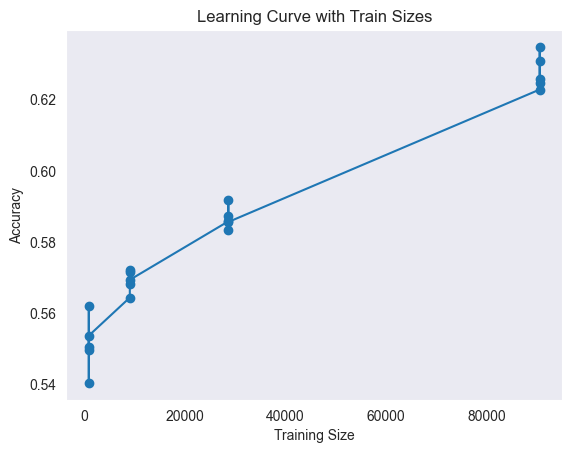

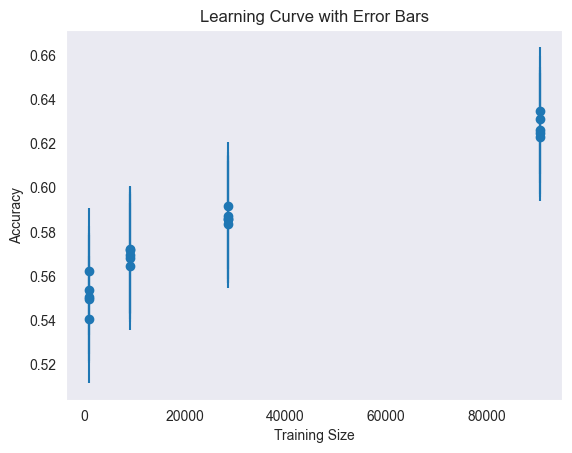

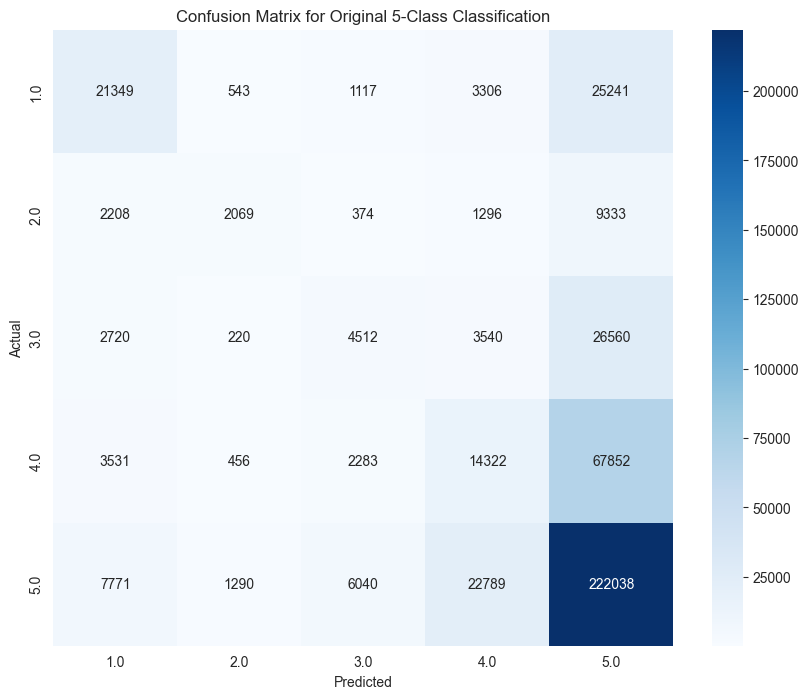

              precision    recall  f1-score   support

         1.0       0.57      0.41      0.48     51556
         2.0       0.45      0.14      0.21     15280
         3.0       0.31      0.12      0.17     37552
         4.0       0.32      0.16      0.21     88444
         5.0       0.63      0.85      0.73    259928

    accuracy                           0.58    452760
   macro avg       0.46      0.34      0.36    452760
weighted avg       0.53      0.58      0.54    452760



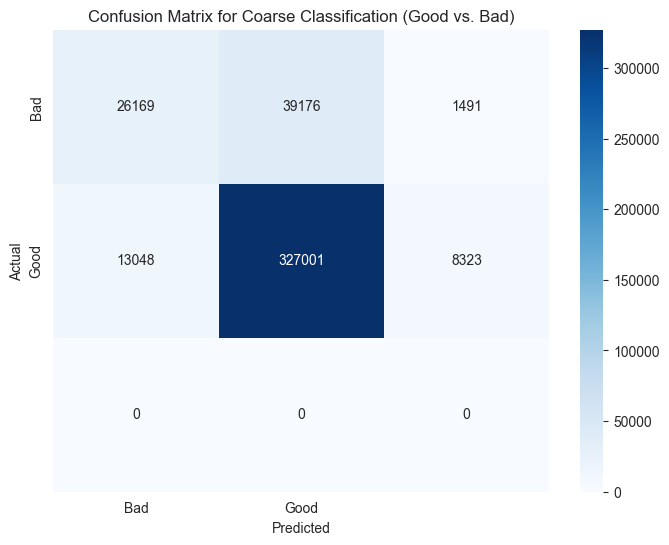

Accuracy for Coarse Classification (Good vs. Bad): 0.8506


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

train_sizes = np.concatenate(([0.01], np.logspace(-1, 0, 3)))  # [0.01, 0.1, 0.5, 1.0]
n_repeats = 20  
accuracies = []
train_sizes_actual = []
all_y_test = []
all_y_pred = []

experiments_per_size = n_repeats // len(train_sizes)

for size in train_sizes:
    for i in range(experiments_per_size):
        X_train, X_test, y_train, y_test = manual_train_test_split(X_corr, y_corr, test_size=0.2, random_state=i)
       
       
        subset_train_idx = X_train.index[:int(len(X_train) * size)]
        X_train_subset = X_train.loc[subset_train_idx]
        y_train_subset = y_train.loc[subset_train_idx]
        
       
        model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=None,class_weight='balanced')
        model.fit(X_train_subset, y_train_subset)
        
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        train_sizes_actual.append(len(X_train_subset))
        
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)
        
        print(f"Experiment with Train Size {len(X_train_subset)}: Accuracy = {accuracy:.3f}")

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)


plt.figure()
plt.plot(train_sizes_actual, accuracies, marker='o', label='Accuracy')
plt.title("Learning Curve with Train Sizes")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


plt.figure()
plt.errorbar(x=train_sizes_actual, y=accuracies, yerr=std_accuracy, fmt='o', label='Accuracy with error bar')
plt.title("Learning Curve with Error Bars")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


conf_matrix = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Original 5-Class Classification")
plt.show()

print(classification_report(all_y_test, all_y_pred))


y_test_coarse = pd.Series(all_y_test).replace({1: 0, 2: 0, 4: 1, 5: 1})
y_pred_coarse = pd.Series(all_y_pred).replace({1: 0, 2: 0, 4: 1, 5: 1})

valid_indices = y_test_coarse != 3
y_test_coarse = y_test_coarse[valid_indices]
y_pred_coarse = y_pred_coarse[valid_indices]


conf_matrix_coarse = confusion_matrix(y_test_coarse, y_pred_coarse)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_coarse, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Coarse Classification (Good vs. Bad)")
plt.show()


accuracy_coarse = accuracy_score(y_test_coarse, y_pred_coarse)
print(f"Accuracy for Coarse Classification (Good vs. Bad): {accuracy_coarse:.4f}")


In [37]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def nested_cross_validation(X, y, param_grid, k_outer=5, k_inner=3):
    outer_folds = manual_kfold(X, y, k=k_outer, random_state=42)
    outer_scores = []
    
    for fold_idx, (train_idx, test_idx) in enumerate(outer_folds):
        X_train_outer, X_test_outer = X.iloc[train_idx], X.iloc[test_idx]
        y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]
        
        best_params = None
        best_score = -np.inf
        
        inner_folds = manual_kfold(X_train_outer, y_train_outer, k=k_inner, random_state=42)
        
        for params in param_grid:
            inner_scores = []
            
            for inner_train_idx, inner_val_idx in inner_folds:
                X_train_inner, X_val_inner = X_train_outer.iloc[inner_train_idx], X_train_outer.iloc[inner_val_idx]
                y_train_inner, y_val_inner = y_train_outer.iloc[inner_train_idx], y_train_outer.iloc[inner_val_idx]
                
                model = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
                model.fit(X_train_inner, y_train_inner)
                
                y_val_pred = model.predict(X_val_inner)
                inner_scores.append(accuracy_score(y_val_inner, y_val_pred))
            
            mean_inner_score = np.mean(inner_scores)
            
            if mean_inner_score > best_score:
                best_score = mean_inner_score
                best_params = params
        
        best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
        best_model.fit(X_train_outer, y_train_outer)
        y_test_pred = best_model.predict(X_test_outer)
        
        test_accuracy = accuracy_score(y_test_outer, y_test_pred)
        outer_scores.append(test_accuracy)
        
        print(f"Fold {fold_idx+1}: Best Params = {best_params}, Test Accuracy = {test_accuracy:.3f}")
    
    mean_score = np.mean(outer_scores)
    std_score = np.std(outer_scores)
    print(f"Nested CV Mean Accuracy: {mean_score:.3f}, Std: {std_score:.3f}")

# Sample 10% of the dataset
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42)

param_grid = [
    {'n_estimators': 50, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': 20},
    {'n_estimators': 200, 'max_depth': None}
]

nested_cross_validation(X_sample, y_sample, param_grid)


Fold 1: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.541
Fold 2: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.549
Fold 3: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.537
Fold 4: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.556
Fold 5: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.558
Nested CV Mean Accuracy: 0.548, Std: 0.009


### 3.2 Medium algorithms: MLP

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import numpy as np

In [39]:
import torch
import torch.nn as nn
import numpy as np

def train_perceptron_pytorch(X_train_scaled, X_test_scaled, y_train, y_test, n_epochs=30, eta=0.01, optimizer='Adam', params=None):
    # Detect if CUDA is available and set the device accordingly
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert Pandas DataFrames to NumPy arrays
    X_train_scaled, X_test_scaled, y_train, y_test = X_train_scaled.to_numpy(), X_test_scaled.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

    # Convert to PyTorch tensors and move them to the appropriate device
    X_train_scaled, X_test_scaled, y_train, y_test = torch.from_numpy(X_train_scaled).to(device), torch.from_numpy(X_test_scaled).to(device), torch.from_numpy(y_train).to(device), torch.from_numpy(y_test).to(device)

    # Check input shapes
    print(f"X_train_scaled shape: {X_train_scaled.shape}")  # 输出形状信息
    print(f"X_test_scaled shape: {X_test_scaled.shape}")

    # Check number of classes
    n_classes = len(torch.unique(y_train))
    y_train = y_train - 1
    y_test = y_test - 1

    # Create iterable dataset in Torch format
    train_ds = torch.utils.data.TensorDataset(X_train_scaled, y_train)
    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32)
    test_ds = torch.utils.data.TensorDataset(X_test_scaled, y_test)
    test_loader = torch.utils.data.DataLoader(test_ds, batch_size=32)

    # Create the multi-layer perceptron model and move it to the device
    # Ensure input size matches the data
    input_size = X_train_scaled.shape[1]  # 动态获取输入特征数

    model = nn.Sequential(
        nn.Linear(input_size, 128, dtype=torch.float64),  # 使用数据的特征数作为输入
        nn.ReLU(),
        nn.Linear(128, 64, dtype=torch.float64),
        nn.ReLU(),
        nn.Linear(64, 32, dtype=torch.float64),
        nn.ReLU(),
        nn.Linear(32, 16, dtype=torch.float64),
        nn.ReLU(),
        nn.Linear(16, n_classes, dtype=torch.float64),
    ).to(device)  # Move model to device

    # Define the loss function
    criterion = nn.CrossEntropyLoss()

    # Use the provided or default parameters
    if params:
        n_epochs = params.get('n_epochs', n_epochs)
        eta = params.get('eta', eta)
        optimizer = params.get('optimizer', optimizer)

    # Setup the optimizer. This implements the basic gradient descent update
    if optimizer == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=eta)
    elif optimizer == 'Momentum':
        optimizer = torch.optim.SGD(model.parameters(), lr=eta, momentum=0.9)
    elif optimizer == 'Adagrad':
        optimizer = torch.optim.Adagrad(model.parameters(), lr=eta, eps=1e-10)
    elif optimizer == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=eta)
    else:
        raise ValueError('Invalid optimizer')

    # Training loop
    for epoch in range(n_epochs):
        for i, (xi, yi) in enumerate(train_loader):
            # Compute loss F(w)
            xi, yi = xi.to(device), yi.to(device).long()  # Move data to the device
            logits = model(xi)
            loss = criterion(logits, yi)

            # Calculate training accuracy for monitoring purposes
            predictions = torch.argmax(logits, dim=1)
            train_acc = torch.mean(torch.eq(predictions, yi).float()).item()

            # Backpropagation
            loss.backward()               # Backward pass (compute parameter gradients)
            optimizer.step()              # Update weight parameter using SGD
            optimizer.zero_grad()         # Reset gradients to zero for next iteration

    # Evaluation loop
    with torch.no_grad():
        for xi, yi in test_loader:
            xi, yi = xi.to(device), yi.to(device).long()  # Move data to the device
            logits = model(xi)
            loss = criterion(logits, yi)
            predictions = torch.argmax(logits, dim=1)
            accuracy = torch.mean(torch.eq(predictions, yi).float()).item()

    return accuracy


In [40]:

X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


params = {
    'n_epochs': 20,
    'eta': 0.01,
    'optimizer': 'Adam'
}


accuracy = train_perceptron_pytorch(X_train_scaled, X_test_scaled, y_train, y_test, n_epochs=params['n_epochs'], eta=params['eta'], optimizer=params['optimizer'])


print(f"Test Accuracy: {accuracy:.4f}")


X_train_scaled shape: torch.Size([260580, 19])
X_test_scaled shape: torch.Size([65145, 19])
Test Accuracy: 0.2800


In [41]:
def nested_cross_validation(X, y, param_grid, outer_k=5, inner_k=3, n_epochs=30, eta=0.01, optimizer='Adam'):
    outer_kf = manual_kfold(X, y, k=outer_k, random_state=42)
    outer_scores = []

    for outer_fold, (train_index, test_index) in enumerate(outer_kf):
        #print(f"Outer Fold {outer_fold + 1}")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        best_params = None
        best_score = -np.inf

        inner_kf = manual_kfold(X_train, y_train, k=inner_k, random_state=42)

        for params in param_grid:
            inner_scores = []
            for inner_fold, (inner_train_index, inner_val_index) in enumerate(inner_kf):
                X_train_inner, X_val_inner = X_train.iloc[inner_train_index], X_train.iloc[inner_val_index]
                y_train_inner, y_val_inner = y_train.iloc[inner_train_index], y_train.iloc[inner_val_index]

                # Scaling
                scaler = StandardScaler()
                X_train_inner_scaled = scaler.fit_transform(X_train_inner)
                X_val_inner_scaled = scaler.transform(X_val_inner)

                # Convert to Pandas DataFrame
                X_train_inner_scaled = pd.DataFrame(X_train_inner_scaled, columns=X_train_inner.columns)
                X_val_inner_scaled = pd.DataFrame(X_val_inner_scaled, columns=X_val_inner.columns)

                # Train model
                val_acc = train_perceptron_pytorch(X_train_inner_scaled, X_val_inner_scaled, y_train_inner, y_val_inner, n_epochs, eta, optimizer, params)
                inner_scores.append(val_acc)

            mean_inner_score = np.mean(inner_scores)
            if mean_inner_score > best_score:
                best_score = mean_inner_score
                best_params = params

        # Train the model with the best parameters
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Convert to Pandas DataFrame
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

        test_acc = train_perceptron_pytorch(X_train_scaled, X_test_scaled, y_train, y_test, n_epochs, eta, optimizer, best_params)
        outer_scores.append(test_acc)

        print(f"Outer Fold {outer_fold + 1}: Best Params = {best_params}, Test Accuracy = {test_acc:.3f}")

    mean_score = np.mean(outer_scores)
    std_score = np.std(outer_scores)
    print(f"Nested CV Mean Accuracy: {mean_score:.3f}, Std: {std_score:.3f}")


param_grid = [
    {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Momentum'},
    {'n_epochs': 30, 'eta': 0.01, 'optimizer': 'Momentum'},
    {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Adam'},
    {'n_epochs': 30, 'eta': 0.01, 'optimizer': 'Adam'}
]


nested_cross_validation(X, y, param_grid, outer_k=5, inner_k=3, n_epochs=30, eta=0.01, optimizer='Adam')

X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([86860, 19])
X_train_scaled shape: torch.Size([173720, 19])
X_test_scaled shape: torch.Size([

KeyboardInterrupt: 

### 3.3 Complex algorithms: TabNet


In [79]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import torch


data_sample = data.sample(frac=0.1, random_state=42)

# X 是特征，y 是目标变量
X = data_sample.drop('review_score', axis=1)
y = data_sample['review_score'].astype(int)  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def manual_kfold(X, y, k=3, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    fold_size = len(X) // k
    folds = []

    for i in range(k):
        test_indices = indices[i * fold_size:(i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    
    return folds


outer_folds = manual_kfold(X_scaled, y, k=3, random_state=42)


param_grid = {
    'n_d': [8, 16, 24],
    'n_a': [8, 16, 24],
    'n_steps': [3, 5, 7],
    'gamma': [1.3, 1.5, 2.0],
    'lambda_sparse': [1e-3, 1e-4, 0]
}

best_params = []
outer_scores = []


for train_indices, test_indices in outer_folds:
    X_train, X_test = X_scaled[train_indices], X_scaled[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]


    inner_folds = manual_kfold(X_train, y_train, k=2, random_state=42)

    best_inner_score = -np.inf
    best_inner_params = None

  
    for n_d in param_grid['n_d']:
        for n_a in param_grid['n_a']:
            for n_steps in param_grid['n_steps']:
                for gamma in param_grid['gamma']:
                    for lambda_sparse in param_grid['lambda_sparse']:
                        
                        inner_scores = []

                        
                        for inner_train_indices, inner_val_indices in inner_folds:
                            X_inner_train, X_inner_val = X_train[inner_train_indices], X_train[inner_val_indices]
                            y_inner_train, y_inner_val = y_train.iloc[inner_train_indices], y_train.iloc[inner_val_indices]

                          
                            tabnet = TabNetClassifier(
                                n_d=n_d,
                                n_a=n_a,
                                n_steps=n_steps,
                                gamma=gamma,
                                lambda_sparse=lambda_sparse
                            )

                            tabnet.fit(
                                X_inner_train, y_inner_train,
                                eval_set=[(X_inner_val, y_inner_val)],
                                eval_metric=['accuracy'],
                                max_epochs=1,
                                patience=3,
                                batch_size=1024,
                                virtual_batch_size=128,
                                num_workers=0,
                                drop_last=False
                            )

                           
                            y_val_pred = tabnet.predict(X_inner_val)
                            accuracy = accuracy_score(y_inner_val, y_val_pred)
                            inner_scores.append(accuracy)

                       
                        avg_inner_score = np.mean(inner_scores)

                       
                        if avg_inner_score > best_inner_score:
                            best_inner_score = avg_inner_score
                            best_inner_params = {
                                'n_d': n_d,
                                'n_a': n_a,
                                'n_steps': n_steps,
                                'gamma': gamma,
                                'lambda_sparse': lambda_sparse
                            }

    
    best_model = TabNetClassifier(**best_inner_params)
    best_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['accuracy'],
        max_epochs=1,
        patience=3,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )

    
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    outer_scores.append(test_accuracy)
    best_params.append(best_inner_params)


mean_score = np.mean(outer_scores)
print(f"Average accuracy score from outer cross-validation: {mean_score}")
print(f"Best hyperparameters from each fold: {best_params}")


epoch 0  | loss: 1.93206 | val_0_accuracy: 0.24242 |  0:00:00s
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.24242
epoch 0  | loss: 2.1077  | val_0_accuracy: 0.15152 |  0:00:00s
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.15152
epoch 0  | loss: 1.93141 | val_0_accuracy: 0.24242 |  0:00:00s
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.24242
epoch 0  | loss: 2.10706 | val_0_accuracy: 0.15152 |  0:00:00s
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.15152
epoch 0  | loss: 1.93134 | val_0_accuracy: 0.24242 |  0:00:00s
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.24242
epoch 0  | loss: 2.10699 | val_0_accuracy: 0.15152 |  0:00:00s
Stop training because you reached max_epochs = 1 with best_epoch = 0 and best_val_0_accuracy = 0.15152
epoc

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.callbacks import Callback
from tqdm import tqdm
import logging
import warnings


warnings.filterwarnings("ignore", category=UserWarning)
logging.getLogger().setLevel(logging.ERROR)


X = data.drop('review_score', axis=1)
y = data['review_score'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


tabnet_model = TabNetClassifier(
    n_d=8,
    n_a=24,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=0.001
)


max_epochs = 100


with tqdm(total=max_epochs, desc="Training Progress", unit="epoch") as pbar:

    
    class TqdmCallback(Callback):
        def on_epoch_end(self, epoch, logs=None):
            pbar.update(1)


    tabnet_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_name=['test'],
        eval_metric=['accuracy'], 
        max_epochs=max_epochs,  
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False,
        callbacks=[TqdmCallback()] 
    )


predictions = tabnet_model.predict(X_test)


results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
print(results.head())

print(f"Loss history: {tabnet_model.history['loss']}")


Training Progress:   1%|          | 1/100 [00:05<09:34,  5.81s/epoch]

epoch 0  | loss: 1.22281 | test_accuracy: 0.58585 |  0:00:05s


Training Progress:   2%|▏         | 2/100 [00:10<08:47,  5.38s/epoch]

epoch 1  | loss: 1.1606  | test_accuracy: 0.58832 |  0:00:10s


Training Progress:   3%|▎         | 3/100 [00:16<08:51,  5.48s/epoch]

epoch 2  | loss: 1.15524 | test_accuracy: 0.5923  |  0:00:16s


Training Progress:   4%|▍         | 4/100 [00:21<08:41,  5.43s/epoch]

epoch 3  | loss: 1.14739 | test_accuracy: 0.59203 |  0:00:21s


Training Progress:   5%|▌         | 5/100 [00:27<08:37,  5.45s/epoch]

epoch 4  | loss: 1.14556 | test_accuracy: 0.59305 |  0:00:27s


Training Progress:   6%|▌         | 6/100 [00:33<09:05,  5.80s/epoch]

epoch 5  | loss: 1.14585 | test_accuracy: 0.59216 |  0:00:33s


Training Progress:   7%|▋         | 7/100 [00:40<09:15,  5.97s/epoch]

epoch 6  | loss: 1.14361 | test_accuracy: 0.59238 |  0:00:40s


Training Progress:   8%|▊         | 8/100 [00:46<09:21,  6.10s/epoch]

epoch 7  | loss: 1.14421 | test_accuracy: 0.59375 |  0:00:46s


Training Progress:   9%|▉         | 9/100 [00:53<09:31,  6.28s/epoch]

epoch 8  | loss: 1.14266 | test_accuracy: 0.59344 |  0:00:53s


Training Progress:  10%|█         | 10/100 [00:59<09:37,  6.42s/epoch]

epoch 9  | loss: 1.14394 | test_accuracy: 0.59216 |  0:00:59s


Training Progress:  11%|█         | 11/100 [01:06<09:38,  6.50s/epoch]

epoch 10 | loss: 1.14447 | test_accuracy: 0.59053 |  0:01:06s


Training Progress:  12%|█▏        | 12/100 [01:12<09:07,  6.22s/epoch]

epoch 11 | loss: 1.14194 | test_accuracy: 0.59199 |  0:01:12s


Training Progress:  13%|█▎        | 13/100 [01:18<08:56,  6.17s/epoch]

epoch 12 | loss: 1.13992 | test_accuracy: 0.59526 |  0:01:18s


Training Progress:  14%|█▍        | 14/100 [01:24<08:46,  6.13s/epoch]

epoch 13 | loss: 1.13668 | test_accuracy: 0.59481 |  0:01:24s


Training Progress:  15%|█▌        | 15/100 [01:29<08:28,  5.98s/epoch]

epoch 14 | loss: 1.13413 | test_accuracy: 0.59645 |  0:01:29s


Training Progress:  16%|█▌        | 16/100 [01:35<08:06,  5.80s/epoch]

epoch 15 | loss: 1.13153 | test_accuracy: 0.59574 |  0:01:35s


Training Progress:  17%|█▋        | 17/100 [01:41<08:02,  5.81s/epoch]

epoch 16 | loss: 1.13001 | test_accuracy: 0.59517 |  0:01:41s


Training Progress:  18%|█▊        | 18/100 [01:46<07:55,  5.80s/epoch]

epoch 17 | loss: 1.13068 | test_accuracy: 0.59446 |  0:01:46s


Training Progress:  19%|█▉        | 19/100 [01:52<07:52,  5.84s/epoch]

epoch 18 | loss: 1.12841 | test_accuracy: 0.59645 |  0:01:52s


Training Progress:  20%|██        | 20/100 [01:58<07:53,  5.91s/epoch]

epoch 19 | loss: 1.12592 | test_accuracy: 0.59574 |  0:01:58s


Training Progress:  21%|██        | 21/100 [02:04<07:43,  5.87s/epoch]

epoch 20 | loss: 1.12559 | test_accuracy: 0.59521 |  0:02:04s


Training Progress:  22%|██▏       | 22/100 [02:10<07:26,  5.72s/epoch]

epoch 21 | loss: 1.12892 | test_accuracy: 0.59521 |  0:02:10s


Training Progress:  23%|██▎       | 23/100 [02:15<07:09,  5.58s/epoch]

epoch 22 | loss: 1.12607 | test_accuracy: 0.5953  |  0:02:15s


Training Progress:  24%|██▍       | 24/100 [02:20<07:06,  5.61s/epoch]

epoch 23 | loss: 1.12413 | test_accuracy: 0.59685 |  0:02:20s


Training Progress:  25%|██▌       | 25/100 [02:26<06:53,  5.52s/epoch]

epoch 24 | loss: 1.12332 | test_accuracy: 0.59733 |  0:02:26s


Training Progress:  26%|██▌       | 26/100 [02:31<06:51,  5.56s/epoch]

epoch 25 | loss: 1.1243  | test_accuracy: 0.59645 |  0:02:31s


Training Progress:  27%|██▋       | 27/100 [02:37<06:37,  5.45s/epoch]

epoch 26 | loss: 1.12174 | test_accuracy: 0.59583 |  0:02:37s


Training Progress:  28%|██▊       | 28/100 [02:42<06:27,  5.39s/epoch]

epoch 27 | loss: 1.1224  | test_accuracy: 0.59724 |  0:02:42s


Training Progress:  29%|██▉       | 29/100 [02:47<06:21,  5.37s/epoch]

epoch 28 | loss: 1.12274 | test_accuracy: 0.59632 |  0:02:47s


Training Progress:  30%|███       | 30/100 [02:53<06:32,  5.60s/epoch]

epoch 29 | loss: 1.12176 | test_accuracy: 0.59724 |  0:02:53s


Training Progress:  31%|███       | 31/100 [02:59<06:29,  5.64s/epoch]

epoch 30 | loss: 1.12101 | test_accuracy: 0.59433 |  0:02:59s


Training Progress:  32%|███▏      | 32/100 [03:05<06:19,  5.58s/epoch]

epoch 31 | loss: 1.12276 | test_accuracy: 0.59693 |  0:03:04s


Training Progress:  33%|███▎      | 33/100 [03:10<06:10,  5.53s/epoch]

epoch 32 | loss: 1.1228  | test_accuracy: 0.59512 |  0:03:10s


Training Progress:  34%|███▍      | 34/100 [03:16<06:08,  5.58s/epoch]

epoch 33 | loss: 1.12212 | test_accuracy: 0.59707 |  0:03:16s


Training Progress:  35%|███▌      | 35/100 [03:21<06:05,  5.63s/epoch]

epoch 34 | loss: 1.12104 | test_accuracy: 0.59627 |  0:03:21s

Early stopping occurred at epoch 34 with best_epoch = 24 and best_test_accuracy = 0.59733


Training Progress:  35%|███▌      | 35/100 [03:25<06:21,  5.86s/epoch]


   Actual  Predicted
0       2          5
1       1          5
2       5          5
3       4          5
4       5          5
Loss history: [1.222808775235779, 1.1605984834820398, 1.1552352344863133, 1.1473934672827024, 1.1455642134092705, 1.1458457621499771, 1.1436136813278235, 1.1442117822526485, 1.1426642932800637, 1.1439424119110568, 1.1444660649481924, 1.1419429721181844, 1.1399197324066837, 1.1366809869472363, 1.1341324111062374, 1.131532362443829, 1.1300123741989185, 1.1306789731838254, 1.1284116840216163, 1.125922789658343, 1.1255912338778735, 1.1289179363438617, 1.1260696790884839, 1.1241294108039117, 1.1233177950676223, 1.1242993919530868, 1.1217356777908365, 1.122400068514291, 1.1227410118374026, 1.1217580409185535, 1.1210091464639615, 1.1227585764443315, 1.1227996413445556, 1.1221246161266993, 1.1210424820436389]


Training Progress:   5%|▌         | 1/20 [00:05<01:46,  5.58s/epoch]

epoch 0  | loss: 1.24817 | test_accuracy: 0.58508 |  0:00:05s


Training Progress:  10%|█         | 2/20 [00:10<01:36,  5.34s/epoch]

epoch 1  | loss: 1.16278 | test_accuracy: 0.5891  |  0:00:10s


Training Progress:  15%|█▌        | 3/20 [00:16<01:34,  5.58s/epoch]

epoch 2  | loss: 1.15566 | test_accuracy: 0.59188 |  0:00:16s


Training Progress:  20%|██        | 4/20 [00:22<01:30,  5.69s/epoch]

epoch 3  | loss: 1.14865 | test_accuracy: 0.59051 |  0:00:22s


Training Progress:  25%|██▌       | 5/20 [00:27<01:23,  5.54s/epoch]

epoch 4  | loss: 1.14344 | test_accuracy: 0.59546 |  0:00:27s


Training Progress:  30%|███       | 6/20 [00:33<01:17,  5.52s/epoch]

epoch 5  | loss: 1.13799 | test_accuracy: 0.59515 |  0:00:33s


Training Progress:  35%|███▌      | 7/20 [00:38<01:10,  5.40s/epoch]

epoch 6  | loss: 1.13473 | test_accuracy: 0.59285 |  0:00:38s


Training Progress:  40%|████      | 8/20 [00:43<01:03,  5.31s/epoch]

epoch 7  | loss: 1.13415 | test_accuracy: 0.59449 |  0:00:43s


Training Progress:  45%|████▌     | 9/20 [00:48<00:57,  5.27s/epoch]

epoch 8  | loss: 1.13364 | test_accuracy: 0.59215 |  0:00:48s


Training Progress:  50%|█████     | 10/20 [00:53<00:52,  5.24s/epoch]

epoch 9  | loss: 1.13285 | test_accuracy: 0.59276 |  0:00:53s


Training Progress:  55%|█████▌    | 11/20 [00:59<00:47,  5.28s/epoch]

epoch 10 | loss: 1.13187 | test_accuracy: 0.59528 |  0:00:59s


Training Progress:  60%|██████    | 12/20 [01:04<00:42,  5.25s/epoch]

epoch 11 | loss: 1.13074 | test_accuracy: 0.59316 |  0:01:04s


Training Progress:  65%|██████▌   | 13/20 [01:09<00:37,  5.29s/epoch]

epoch 12 | loss: 1.12901 | test_accuracy: 0.59541 |  0:01:09s


Training Progress:  70%|███████   | 14/20 [01:15<00:31,  5.29s/epoch]

epoch 13 | loss: 1.12756 | test_accuracy: 0.59537 |  0:01:15s


Training Progress:  75%|███████▌  | 15/20 [01:20<00:26,  5.33s/epoch]

epoch 14 | loss: 1.12735 | test_accuracy: 0.59369 |  0:01:20s

Early stopping occurred at epoch 14 with best_epoch = 4 and best_test_accuracy = 0.59546


Training Progress:  75%|███████▌  | 15/20 [01:23<00:27,  5.57s/epoch]


   Actual  Predicted
0       1          4
1       0          4
2       4          4
3       3          4
4       4          4
Loss history: [1.2481667912346672, 1.162776812450777, 1.1556646020413366, 1.1486483017669376, 1.14344153832997, 1.1379897382032815, 1.1347285047082167, 1.1341542914204525, 1.1336437605750485, 1.132852001041692, 1.1318689047799886, 1.1307446462815418, 1.1290074426869419, 1.1275637881219123, 1.1273470921292896]
epoch 0  | loss: 2.04333 | test_accuracy: 0.53715 |  0:00:00s
epoch 1  | loss: 1.86785 | test_accuracy: 0.54607 |  0:00:01s
epoch 2  | loss: 1.71253 | test_accuracy: 0.5508  |  0:00:01s
epoch 3  | loss: 1.60207 | test_accuracy: 0.54298 |  0:00:02s
epoch 4  | loss: 1.44991 | test_accuracy: 0.52739 |  0:00:02s
epoch 5  | loss: 1.47771 | test_accuracy: 0.50331 |  0:00:03s
epoch 6  | loss: 1.38379 | test_accuracy: 0.47805 |  0:00:03s
epoch 7  | loss: 1.33216 | test_accuracy: 0.47668 |  0:00:04s

Early stopping occurred at epoch 7 with best_epoch = 2 and best_te

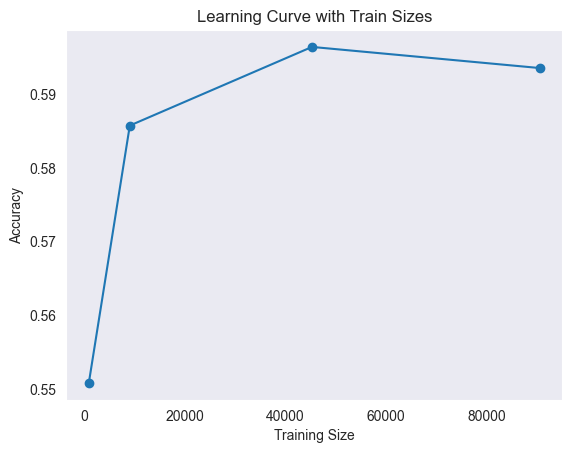

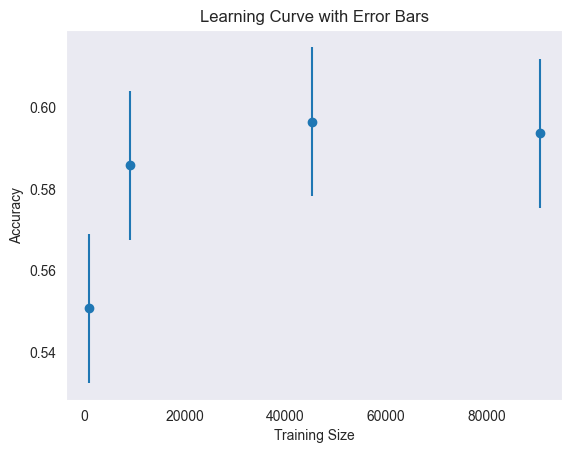

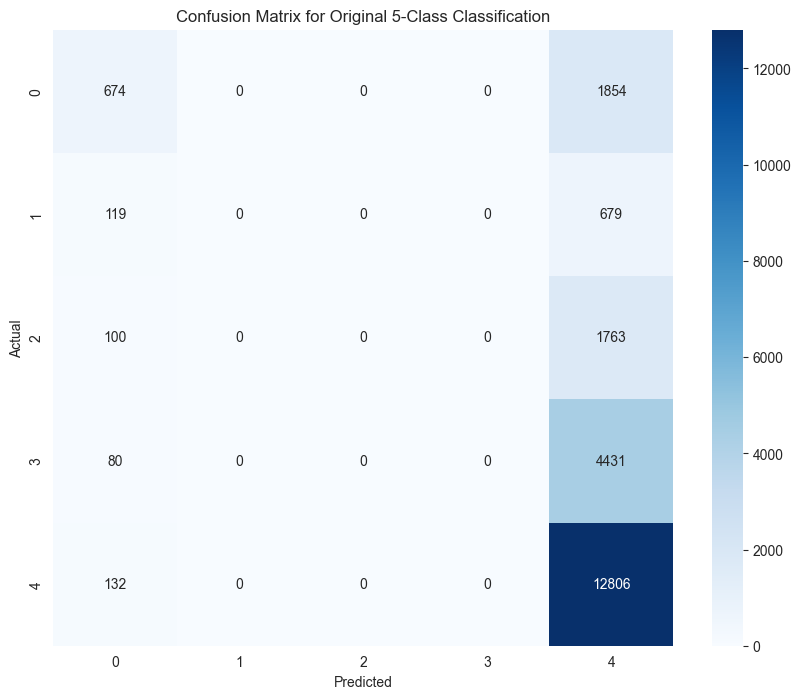

              precision    recall  f1-score   support

           0       0.61      0.27      0.37      2528
           1       0.00      0.00      0.00       798
           2       0.00      0.00      0.00      1863
           3       0.00      0.00      0.00      4511
           4       0.59      0.99      0.74     12938

    accuracy                           0.60     22638
   macro avg       0.24      0.25      0.22     22638
weighted avg       0.41      0.60      0.47     22638



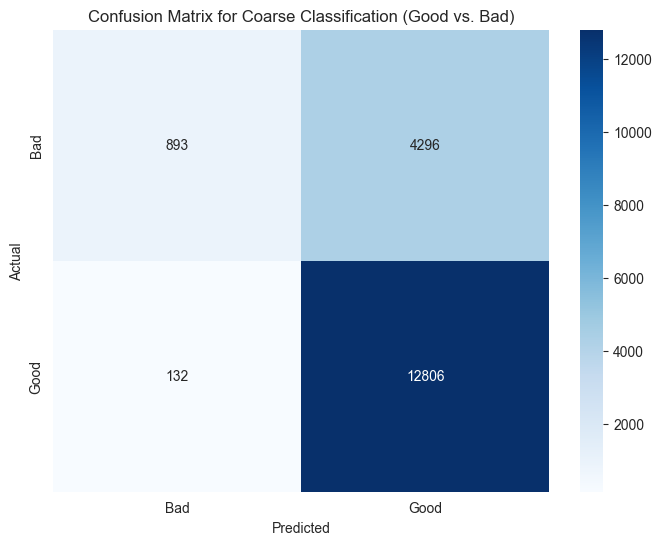

Accuracy for Coarse Classification (Good vs. Bad): 0.7557


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.callbacks import Callback
from tqdm import tqdm
import logging
import warnings


warnings.filterwarnings("ignore", category=UserWarning)
logging.getLogger().setLevel(logging.ERROR)


X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


tabnet_model = TabNetClassifier(
    n_d=8,
    n_a=24,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=0.001
)

max_epochs = 20


with tqdm(total=max_epochs, desc="Training Progress", unit="epoch") as pbar:
    class TqdmCallback(Callback):
        def on_epoch_end(self, epoch, logs=None):
            pbar.update(1)

    
    tabnet_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_name=['test'],
        eval_metric=['accuracy'],
        max_epochs=max_epochs,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False,
        callbacks=[TqdmCallback()]
    )


predictions = tabnet_model.predict(X_test)


results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
print(results.head())


print(f"Loss history: {tabnet_model.history['loss']}")


train_sizes = [len(X_train) * 0.01, len(X_train) * 0.1, len(X_train) * 0.5, len(X_train)]  # [0.01, 0.1, 0.5, 1.0]
accuracies = []


for size in train_sizes:
    subset_idx = np.random.choice(len(X_train), int(size), replace=False)
    X_train_subset = X_train[subset_idx]
    y_train_subset = y_train[subset_idx]
    
  
    tabnet_model.fit(
        X_train_subset, y_train_subset,
        eval_set=[(X_test, y_test)],
        eval_name=['test'],
        eval_metric=['accuracy'],
        max_epochs=max_epochs,
        patience=5,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False,
        callbacks=[TqdmCallback()]
    )
    
    y_pred_subset = tabnet_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_subset)
    accuracies.append(accuracy)


plt.figure()
plt.plot(train_sizes, accuracies, marker='o', label='Accuracy')
plt.title("Learning Curve with Train Sizes")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

plt.figure()
plt.errorbar(x=train_sizes, y=accuracies, yerr=std_accuracy, fmt='o', label='Accuracy with error bar')
plt.title("Learning Curve with Error Bars")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Original 5-Class Classification")
plt.show()

print(classification_report(y_test, predictions))


y_test_coarse = pd.Series(y_test).replace({1: 0, 2: 0, 4: 1, 5: 1})
y_pred_coarse = pd.Series(predictions).replace({1: 0, 2: 0, 4: 1, 5: 1})

valid_indices = y_test_coarse != 3
y_test_coarse = y_test_coarse[valid_indices]
y_pred_coarse = y_pred_coarse[valid_indices]

conf_matrix_coarse = confusion_matrix(y_test_coarse, y_pred_coarse)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_coarse, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Coarse Classification (Good vs. Bad)")
plt.show()

accuracy_coarse = accuracy_score(y_test_coarse, y_pred_coarse)
print(f"Accuracy for Coarse Classification (Good vs. Bad): {accuracy_coarse:.4f}")


Experiment with Train Size 90554: Accuracy = 0.570
Experiment with Train Size 90554: Accuracy = 0.570
Experiment with Train Size 90554: Accuracy = 0.570
Experiment with Train Size 90554: Accuracy = 0.570


C:\Users\Tom\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Tom\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Tom\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Tom\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Tom\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\T

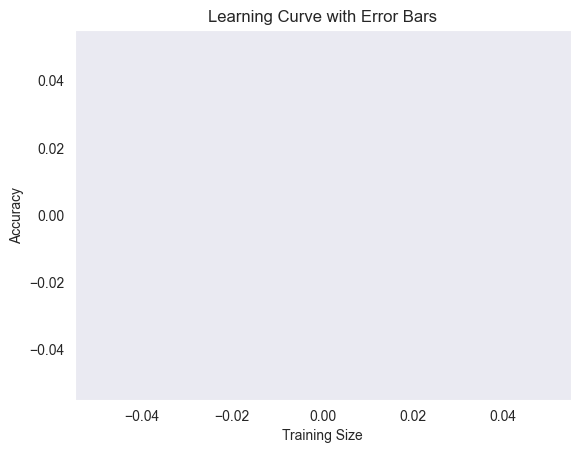

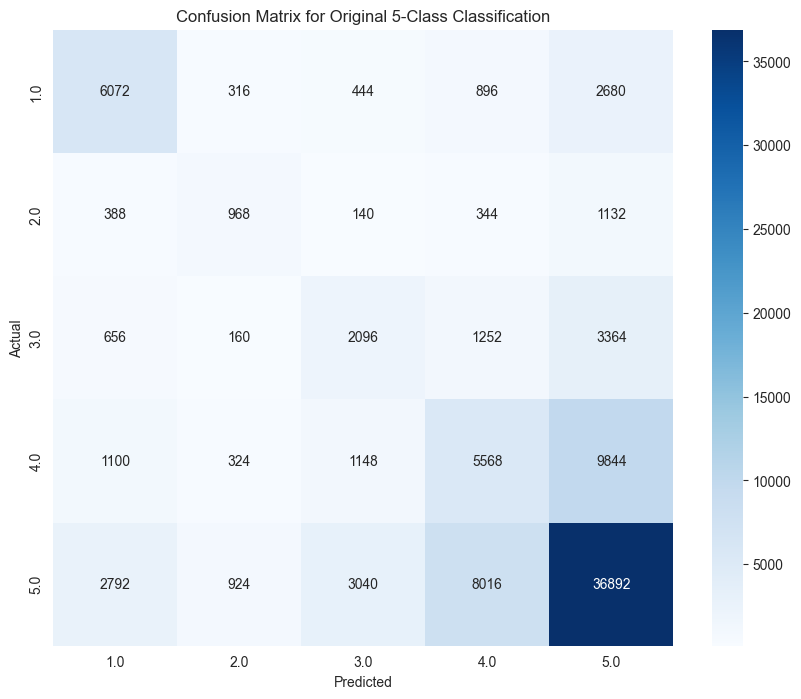

              precision    recall  f1-score   support

         0.0       0.55      0.58      0.57     10408
         1.0       0.36      0.33      0.34      2972
         2.0       0.31      0.28      0.29      7528
         3.0       0.35      0.31      0.33     17984
         4.0       0.68      0.71      0.70     51664

    accuracy                           0.57     90556
   macro avg       0.45      0.44      0.45     90556
weighted avg       0.56      0.57      0.56     90556



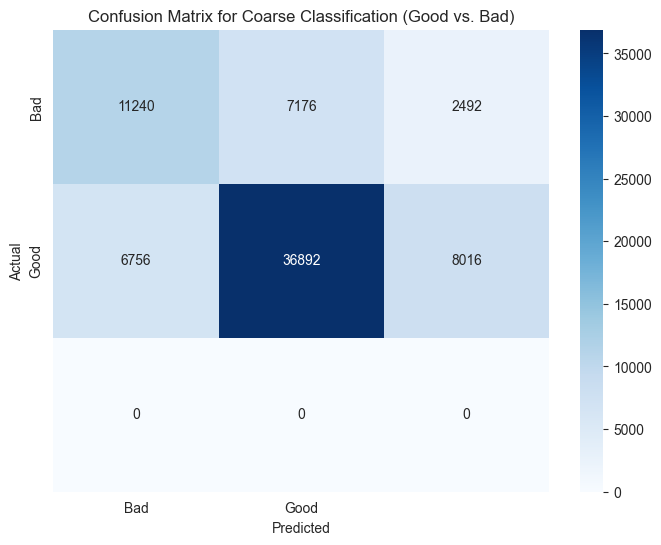

Accuracy for Coarse Classification (Good vs. Bad): 0.6632


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier



n_repeats = 4
train_sizes = np.concatenate(([0.01], np.logspace(-1, 0, 3)))  # [0.01, 0.1, 0.5, 1.0]
accuracies = []
train_sizes_actual = []
all_y_test = []
all_y_pred = []

experiments_per_size = n_repeats // len(train_sizes)

for size in train_sizes:
    for i in range(experiments_per_size):
        
        X_train, X_test, y_train, y_test = manual_train_test_split(X_corr, y_corr, test_size=0.2, random_state=i)

     
        y_train = y_train - y_train.min()
        y_test = y_test - y_test.min()
        
      
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        
        class_weights = {label: len(y_train) / count for label, count in y_train.value_counts().items()}
        sample_weights = y_train.map(class_weights)
        sample_weights = sample_weights.clip(lower=1e-6)  

        
        xgb_model = XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=100,  
            objective='multi:softmax',
            num_class=len(np.unique(y_train)),
            tree_method='hist',
            device='cuda' 
        )

      
        xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

      
        y_pred = xgb_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        
        accuracies.append(accuracy)
        train_sizes_actual.append(len(X_train))
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

        print(f"Experiment with Train Size {len(X_train)}: Accuracy = {accuracy:.3f}")


mean_accuracies = []
std_accuracies = []

for size in train_sizes:
    accuracies_for_size = [accuracies[i] for i in range(len(train_sizes_actual)) if train_sizes_actual[i] == size * len(X)]
    mean_accuracies.append(np.mean(accuracies_for_size))
    std_accuracies.append(np.std(accuracies_for_size))


plt.figure()
plt.errorbar(x=train_sizes * len(X), y=mean_accuracies, yerr=std_accuracies, fmt='o', label='Accuracy with error bar')
plt.title("Learning Curve with Error Bars")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

#
conf_matrix = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Original 5-Class Classification")
plt.show()

print(classification_report(all_y_test, all_y_pred))


y_test_coarse = pd.Series(all_y_test).replace({1: 0, 2: 0, 4: 1, 5: 1})
y_pred_coarse = pd.Series(all_y_pred).replace({1: 0, 2: 0, 4: 1, 5: 1})


valid_indices = y_test_coarse != 3
y_test_coarse = y_test_coarse[valid_indices]
y_pred_coarse = y_pred_coarse[valid_indices]


conf_matrix_coarse = confusion_matrix(y_test_coarse, y_pred_coarse)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_coarse, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Coarse Classification (Good vs. Bad)")
plt.show()


accuracy_coarse = accuracy_score(y_test_coarse, y_pred_coarse)
print(f"Accuracy for Coarse Classification (Good vs. Bad): {accuracy_coarse:.4f}")

review_score
4    0.575521
3    0.192689
0    0.113655
2    0.084219
1    0.033916
Name: proportion, dtype: float64
